## 비지도 학습이란 무엇이고 지도 학습과는 어떤 차이가 있나요?

비지도학습(Unsupervised learning) 이란, 정답 레이블이 주어지는 지도학습과 달리 training data로 정답(label)이 없는 데이터가 주어지는 학습방법이다. 

## 군집과 센트로이드란 무엇인가요?

군집분석이란 동일한 성격을 가진 여러 개의 그룹을 대상을 분류하는것을 말한다. 여기서 나뉜 부분집단을 군집이라 명칭한다.센트로이드는 각각 군집에서 중앙에 있는 값을 말한다.

## k-means 알고리즘은 어떤 방식을 통해 작동하고 어떤 한계를 가지고 있나요?

k-평균 알고리즘(K-means clustering algorithm)은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.  


* k-평균 알고리즘은 한계가 존재한다.
*  최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 한다. 또한 클러스 개수를 지정해야 한다. 
* k-평균은 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

## 센트로이드 초기화를 해주는 이유와 그 방법은 무엇인가요?

k-평균 알고리즘은 무작위로 K개의 샘플을 뽑아 그 위치를 센트로이드로 선정한 후 샘플에 레이블을 할당하고 센트로이드를 업데이트 한다. 센트로이드 변화가 없을 때 까지 이를 지속하는데 따라서 센트로이드 초기화에 따라 솔루션과 속도가 달라질 수 있다. 이 때문에 센트로이틀 초기화를 이용한다. 

* 센트로이드 초기화 방법
* 센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가 2006년 논문에서 제안한 다음 알고리즘을 사용해 초기화하는 것이 더 좋다.
* * 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택.
* $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택. 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리이다. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높인다.
* $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복한다.


K-평균++ 알고리즘의 나머지는 일반 K-평균과 같다. 이 초기화 방식을 사용하면 K-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 훨씬 높아진다. 따라서 `n_init` 값을 상당히 줄일 수 있다. 대부분의 경우 `n_init`를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상한다.


K-평균++ 초기화를 사용하려면 간단하게 `init="k-means++"`로 지정하면 된다(사실 이 값이 기본값):

##  최적의 클러스터 개수는 어떤 방법을 통해 찾을 수 있나요?

최선의 솔루션을 알기 위해서는 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱거리를 사용하며 모델의 이너셔라고 부르는데 k개의 수를 정할 때 이너셔는 좋은 성능 지표가 아니다. 이너셔는 k가 증가함에 따라 점점 작아지기 때문이다.

더 정확한 방법은 **실루엣 점수**을 사용하는 것이다. 이 값은 모든 샘플에 대한 실루엣 계수의 평균이다.   

샘플의 실루엣 계수는 **$(b-a) / max(a,b)$** 

* a는 동일한 클러스터에 있는 다른 샘플까지 평균거리(클러스터 내부거리)
* b는 가장 가까운 클러스터까지 평균 거리(가장 가까운 클러스터의 샘플까지 평균거리, 샘플과 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터이다. ) 

실루엣 계수는 -1 ~ 1 까지 바뀔 수 있다. 1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 의미이다.  실루엣 계수가 0에 가까우면 클러스터 경계에 위치한다는 의미이고 -1에 가까우면 샘플이 잘못된 클러스터에 할당되었다는 의미이다.

## 색상 분할에서 군집은 어떤 방식으로 사용할 수 있나요? 

이미지 분할은 이미지를 세그먼트 여러 개로 분할하는 작업이다. 시맨틱분할 에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다. 

## DBSCAN은 어떤 방식으로 작동하고 언제 좋은 성능을 내나요?

밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다. 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.

* 알고리즘이 각 샘플에서 작은 거리인 입실론내에 샘플이 몇 개 놓여 있는지 구한다. $e-이웃$ 이라고 한다. 
* 자기 자신을 포함해 $e-이웃$ 내에 적어도 min-samples개 샘플이 있다면 이를 핵심샘플로 간주한. 즉 핵심 샘플은 밀집된 지역에 있는 샘플이다. 
* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
* 핵심 샘플이 아니고 이웃도 아닌 샘플을 이상치로 판단한다. 

알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과  잘 구분될 때 좋은 성능을 낸다. 

## 가우시안 혼합 모델이란 무엇이고 어떤 방식으로 작동하나요?

가우시안 혼합 모델(GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다. 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성한다.

* GMM은 하나의 데이터가 클러스터들과 얼마나 연관성이 있는지 알 수 있는 Soft Clustering 방식을 사용한다.
* GMM이 최대한 주어진 데이터의 분포와 유사해지도록 위에서 언급된 GMM의 매개변수들을 조정해야 한다.
* GMM을 가우시안 함수의 합으로 모델링하면 계산이 복잡해지므로, 잠재변수 를 도입해 모델링한다..
* 매개변수를 최적화시키기 위해서는 반복법 적용하여 반복적인 매개변수 업데이트를 통해 최적화해야 하는데, 이 때 사용되는 알고리즘을 기댓값 최대화 알고리즘이라고 한다.


GMM은 $k\in\{ 1, \cdots, K \}$ 정의 되는 가우시안 함수로 구성된 함수이다. K는 데이터셋에서의 클러스터 개수, 혼합 모델에서 사용되는 각각의 가우시안 함수 k는 매개변수들을 같는데 다음과 같다. 

* 가우시안 함수의 중심부를 의미하는 평균값 $ \mu$
* 가우시안 함수의 너비를 의미하는 공분산 $\Sigma $ 
* 가우시안 함수의 크기를 의미하는 혼합계수 $\pi$ 

혼합계수는 데이터가 해당 클러스터에 포함된 사전 확률이기 때문에 $ \sum_{k=1}^K \pi_{k}=1\tag{1} $ 식을 만족해야함

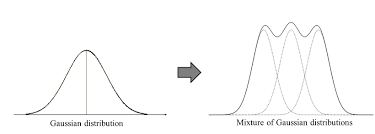

---- 

목적은 주어진 데이터의 각 클러스터가 가우시안 분포를 가진다는 가정하에서 GMM을 모델링하는것
GMM이 최대한 주어진 데이터의 분포와 유사해지도록 GMM의 매개변수를 조정해야함 

* 가우시안 함수 식 
$ \mathcal{N}(\boldsymbol{x}|\mu,\Sigma)=\frac{1}{(2\pi)^\frac{D}{2}|\Sigma|^\frac{1}{2}}exp(-\frac{1}{2}(\boldsymbol{x}-\mu)^{T}\Sigma^{-1}(\boldsymbol{x}-\mu))\tag{2} $ 

x는 데이터, D는 데이터의 차원수

* 양변에 로그를 취할 경우 (용이성을 위해) 
$ \log{\mathcal{N}(\boldsymbol{x}|\mu,\Sigma)}=-\frac{D}{2}\log{2\pi}-\frac{1}{2}\log{\Sigma}-\frac{1}{2}(\boldsymbol{x}-\mu)^{T}\Sigma^{-1}(\boldsymbol{x}-\mu)\tag{3}$ 

위 식을 $ \mu$와 $\Sigma $ 로 편미분하고, 식이 0이 되는 해를 구하면 가장 최적의 매개변수를 구할 수 있다. 이 방법은 최대가능도 추정,MLE로 구한해

--- 

한개의 가우시안 함수가 아닌 여러 개의 가우시안 함수가 혼합된 GMM을 모델링해야하기 때문에 잠재변수라는 개념을 식을 사용한다. 잠재변수란, 직접적으로 관찰/측정이 되지 않는 변수이다. 이로 인해 다른 변수를 통해서 간접적으로만 측정이 가능한 변수이다. 

$ p(\boldsymbol{X})=\prod_{n=1}^N p(\boldsymbol{x}_{n})=\prod_{n=1}^N \sum_{k=1}^K p(\boldsymbol{x}_{n},\boldsymbol{z})\qquad\qquad\qquad\qquad\qquad $ 

* 양변의 로그 사용 
$ \log{p(\boldsymbol{X})}=\sum_{n=1}^N \log \sum_{k=1}^K \pi_{k}\mathcal{N}(\boldsymbol{x}_{n}|\mu_{k},\Sigma_{k})\tag{11} $ 

식을 미분해주면 매개변수를 최적화시킬 수 있지만, 식에 가 있기 때문에 미분하기에는 매우 까다롭다. 따라서 매개변수를 최적화시키기 위해서는 반복법(Iterative Method)을 적용하여 반복적인 매개변수 업데이트를 통해 최적화해야한ㄷ. 이 때 사용되는 알고리즘을 기댓값 최대화 알고리즘(Expectation-Maximization Algorithm, EM Algorithm)이라고 한다. 

알고리즘은 매개변수에 관한 추정값으로 log-likelihood의 기댓값을 계산하는 expectation 단계와 이 기댓값을 최대화하는 maximization 단계를 번갈아가며 적용


## 가우시안 혼합을 통하여 어떻게 이상치를 찾을 수 있나요?

밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다. 이렇게 하기 위해서 사용할 밀도 임곗값을 정한다. 예를 들어 결함 제품을 감지하려는 제조 회사는 일반적으로 결함 제품의 비율을 알고 있다. 이를 4%로 가정, 밀도 임곗값을 이 값으로 설정하면 밀도가 낮은 지역에 있는 샘플의 4%를 얻을 수 있다. 만약 거짓 양성이 너무 많다면(완벽하게 정상인 제품이 결함으로 표시되었다면) 임곗값을 더 낮춘다. 반대로 거짓 음성이 너무 많다면(즉 결함 제품이 결함으로 표시되지 않았다면) 임곗값을 높인다. 

## 가우시안 혼합 모델을 사용할 때 적절한 클러스터 개수를 찾는 기법은 어떤 것이 있고 어떻게 작동하나요?

BIC(Bayesian information criterion)이나 AIC(Akaike information criterion)와 같은 이론적 정보 기준을 최소화 하는 모델을 찾는다. 
BIC와 AIC는 모두 학습할 파라미터가 많은 모델에서 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더한다. 이 둘은 종종 동일한 모델을 선택한다. 둘의 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있다. 하지만 데이터에 아주 잘 맞지 않을 수 있다.